In [0]:
!pip install scikit-plot

In [0]:
#!/usr/bin/env python
# coding: utf-8

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#y_train_ohe = ohe.fit_transform(y_train)
# Encoding training dataset

In [0]:
df= pd.read_csv("train.csv")

In [0]:
dx = pd.DataFrame(df.drop(['Activity','subject'],axis=1))
dy_label = df.Activity.values.astype(object)

In [0]:
from sklearn import linear_model
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [0]:
# encoding train labels 
encoder.fit(dy_label)
dy = encoder.transform(dy_label)

In [0]:
dy.shape

(7352,)

In [0]:
#PCA APPLY
from sklearn.decomposition import PCA,TruncatedSVD
pca= PCA(n_components=150, whiten= 'True')
x= pca.fit(dx).transform(dx)


In [0]:
x.shape

(7352, 150)

In [0]:
dy.shape

(7352,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,dy,test_size=0.2, random_state=4)

In [0]:
X_train.shape

(5881, 150)

In [0]:
Y_train.shape

(5881, 6)

In [0]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 512, activation = 'relu', input_dim = 150))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax'))


In [0]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [0]:
from keras.utils import to_categorical
Y_test = to_categorical(Y_test)

Y_train = to_categorical(Y_train)

In [0]:
X_train.shape

(5881, 150)

In [0]:
X_test.shape

(1471, 150)

In [0]:
Y_train.shape

(5881, 6)

In [0]:
Y_test.shape

(1471, 6)

In [0]:
hist=classifier.fit(X_train, Y_train, batch_size=350, epochs = 100, validation_data=(X_test,Y_test))

Train on 5881 samples, validate on 1471 samples
Epoch 1/100
5881/5881 [==============================] - 1s 184us/step - loss: 2.4954e-06 - acc: 1.0000 - val_loss: 0.0853 - val_acc: 0.9878
Epoch 2/100
5881/5881 [==============================] - 1s 165us/step - loss: 2.4419e-06 - acc: 1.0000 - val_loss: 0.0855 - val_acc: 0.9878
Epoch 3/100
5881/5881 [==============================] - 1s 169us/step - loss: 2.3925e-06 - acc: 1.0000 - val_loss: 0.0856 - val_acc: 0.9878
Epoch 4/100
5881/5881 [==============================] - 1s 161us/step - loss: 2.3428e-06 - acc: 1.0000 - val_loss: 0.0857 - val_acc: 0.9878
Epoch 5/100
5881/5881 [==============================] - 1s 165us/step - loss: 2.2949e-06 - acc: 1.0000 - val_loss: 0.0857 - val_acc: 0.9878
Epoch 6/100
5881/5881 [==============================] - 1s 166us/step - loss: 2.2485e-06 - acc: 1.0000 - val_loss: 0.0859 - val_acc: 0.9878
Epoch 7/100
5881/5881 [==============================] - 1s 170us/step - loss: 2.2024e-06 - acc: 1.0000 - 

In [0]:
y_pred = classifier.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(y_pred)

[[1.0000000e+00 3.0967694e-08 9.7651249e-13 1.2122913e-12 9.5176211e-12
  3.0261033e-10]
 [1.3846604e-07 2.7526381e-19 2.4761207e-10 7.0859074e-13 5.9008792e-10
  9.9999988e-01]
 [1.0000000e+00 9.5441068e-12 5.4887484e-14 2.3371692e-14 2.3767958e-15
  7.1614471e-11]
 ...
 [1.0000000e+00 2.9175848e-13 5.0225484e-15 3.0431588e-15 1.9093573e-15
  2.9105609e-08]
 [4.1011829e-12 2.3442859e-10 2.5027208e-13 9.9999988e-01 3.5152433e-11
  1.2411921e-07]
 [4.8526829e-17 6.1840034e-12 2.0278351e-18 1.0000000e+00 3.2135327e-13
  2.6248686e-11]]
[[ True False False False False False]
 [False False False False False  True]
 [ True False False False False False]
 ...
 [ True False False False False False]
 [False False False  True False False]
 [False False False  True False False]]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)


[[262   0   0   0   0   0]
 [  0 280   4   0   0   0]
 [  0  10 265   0   0   1]
 [  0   0   0 239   0   1]
 [  0   0   1   1 176   0]
 [  0   0   0   0   0 231]]


In [0]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test, y_pred)*100,'%')
#print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')
print(classification_report(Y_test,y_pred))

98.77634262406526 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       0.97      0.99      0.98       284
           2       0.98      0.96      0.97       276
           3       1.00      1.00      1.00       240
           4       1.00      0.99      0.99       178
           5       0.99      1.00      1.00       231

   micro avg       0.99      0.99      0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471
 samples avg       0.99      0.99      0.99      1471



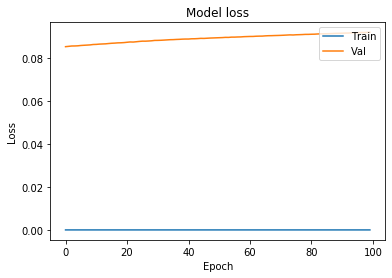

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()



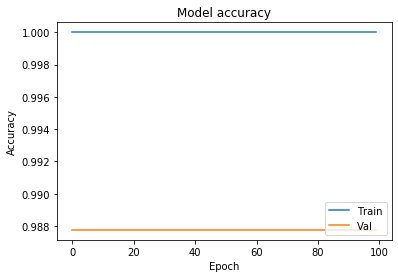

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()



In [0]:
X_train.shape

(5881, 150)

In [0]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    
  ])

    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [0]:
model = get_compiled_model()
model.fit(X_train, epochs=10)

Train on 5881 samples
Epoch 1/10
5881/5881 [==============================] - 0s 71us/sample - loss: 1.8482 - acc: 0.0010
Epoch 2/10
5881/5881 [==============================] - 0s 49us/sample - loss: 1.7990 - acc: 0.0000e+00
Epoch 3/10
5881/5881 [==============================] - 0s 55us/sample - loss: 1.7941 - acc: 0.0000e+00
Epoch 4/10
5881/5881 [==============================] - 0s 54us/sample - loss: 1.7927 - acc: 0.0000e+00
Epoch 5/10
5881/5881 [==============================] - 0s 60us/sample - loss: 1.7922 - acc: 0.0000e+00
Epoch 6/10
5881/5881 [==============================] - 0s 58us/sample - loss: 1.7920 - acc: 0.0000e+00
Epoch 7/10
5881/5881 [==============================] - 0s 54us/sample - loss: 1.7919 - acc: 0.0000e+00
Epoch 8/10
5881/5881 [==============================] - 0s 56us/sample - loss: 1.7919 - acc: 0.0000e+00
Epoch 9/10
5881/5881 [==============================] - 0s 56us/sample - loss: 1.7918 - acc: 0.0000e+00
Epoch 10/10
5881/5881 [=======================